k = 1, acc = 0.58, error = 0.42
k = 2, acc = 0.56, error = 0.44
k = 3, acc = 0.58, error = 0.42
k = 4, acc = 0.58, error = 0.42
k = 5, acc = 0.58, error = 0.42
k = 6, acc = 0.5, error = 0.50
k = 7, acc = 0.6, error = 0.40
k = 8, acc = 0.48, error = 0.52
k = 9, acc = 0.58, error = 0.42
k = 10, acc = 0.56, error = 0.44
k = 11, acc = 0.54, error = 0.46
k = 12, acc = 0.62, error = 0.38
k = 13, acc = 0.58, error = 0.42
k = 14, acc = 0.6, error = 0.40
k = 15, acc = 0.6, error = 0.40
k = 16, acc = 0.62, error = 0.38
k = 17, acc = 0.6, error = 0.40
k = 18, acc = 0.6, error = 0.40
k = 19, acc = 0.52, error = 0.48
k = 20, acc = 0.58, error = 0.42
k = 21, acc = 0.5, error = 0.50
k = 22, acc = 0.58, error = 0.42
k = 23, acc = 0.6, error = 0.40
k = 24, acc = 0.62, error = 0.38
k = 25, acc = 0.62, error = 0.38
k = 26, acc = 0.62, error = 0.38
k = 27, acc = 0.62, error = 0.38
k = 28, acc = 0.62, error = 0.38
k = 29, acc = 0.62, error = 0.38
k = 30, acc = 0.6, error = 0.40
k = 31, acc = 0.56, error = 

(12, 0.38)

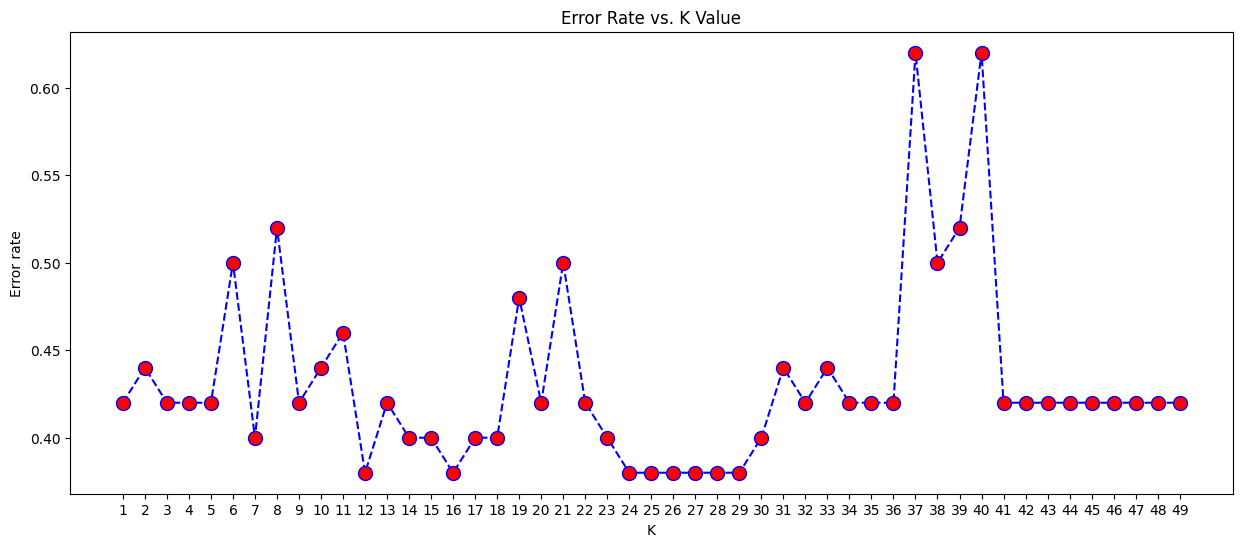

In [2]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Uses 2000 as train
df1 = pd.read_csv('obesity_election_2000.csv') 
df1.columns = ['State', 'index', 'vote', 'abbv']

# Convert the index str to float and save it as feature
df1['index'] = df1['index'].str.replace('%', '').astype(float) 
X = df1['index'].values.reshape(-1,1) 

# Convert Democrats to 0 and Repulicans to 1 
df1['vote'] = df1['vote'].map({'D': 0, 'R': 1}).values
y = df1['vote']

# Uses Leave one out cross validation to find the optimal k value
loo = LeaveOneOut()
k_vals = range(1,50)
acc_scores = []

for k in k_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)  
    preds = []
        
    for i ,(train_index, test_index) in enumerate(loo.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(f"fold {i}")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")

        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        # print(f"k = {k} i = {i} pred = {pred}")
        preds.append(pred)
        
        
    acc = accuracy_score(y, preds)
    acc_scores.append(acc)
    
err = [1 - acc for acc in acc_scores ]
opt_k = k_vals[acc_scores.index(max(acc_scores))]
opt_acc = max(acc_scores)
res_err = 1 - opt_acc
for i in k_vals :
    print(f"k = {i}, acc = {acc_scores[i-1]}, error = {1.00-acc_scores[i-1]:.2f}" )



plt.figure(figsize=(15,6))
plt.plot(k_vals, err,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.xticks(k_vals)

    
opt_k, res_err

In [3]:
opt_ks = [12,16,24,25,26,27,28,29]
df2 = pd.read_csv('obesity_election_2004.csv')
df2.columns = ['State', 'index', 'vote', 'abbv']

df2['index'] = df2['index'].str.replace('%', '').astype(float) 
X_test = df2['index'].values.reshape(-1,1) 

df2['vote'] = df2['vote'].map({'D': 0, 'R': 1}).values
y_test = df2['vote']

for opt_k in opt_ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors= opt_k)
    knn.fit(X, y) # take 2004 as training data
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    test_err = 1 - acc

    print(test_err)

0.38
0.36
0.36
0.36
0.36
0.36
0.36
0.36
